In [ ]:
import pandas as pd
import numpy as np

In [ ]:
housing = pd.read_csv("Delhi.csv")
housing.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


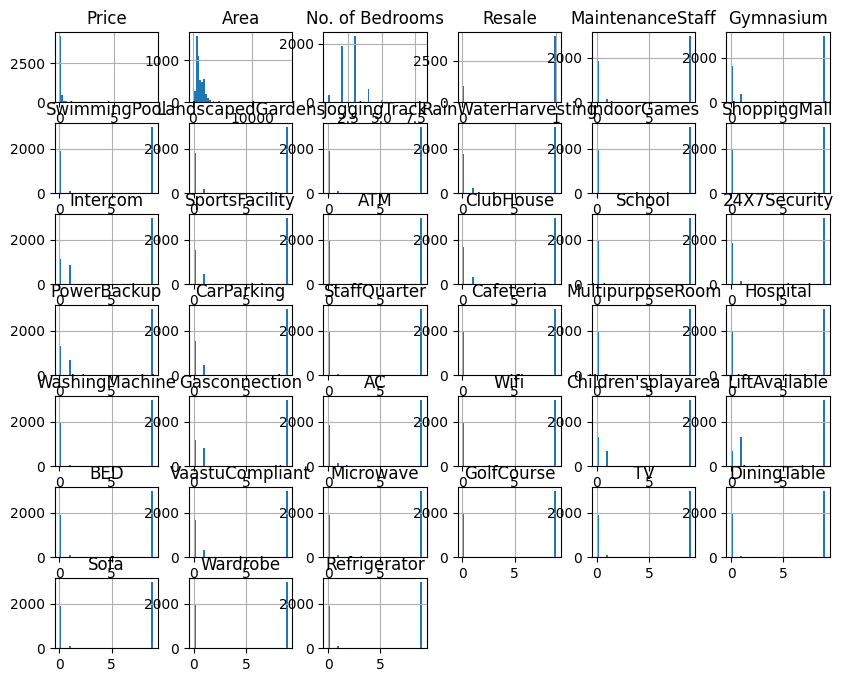

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(10, 8))
plt.show()

In [ ]:
housing.rename(columns={"No. of Bedrooms":"Bedrooms","Children'splayarea":"Playarea"}, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_location=LabelEncoder()
housing["Location"]=le_location.fit_transform(housing["Location"])

In [ ]:
"""corr_matrix = housing.corr()
print(corr_matrix["Price"].sort_values(ascending=False))
"""
housing_labels=housing["Price"]
housing_labels=np.log(housing["Price"]).values

housing=housing.drop("Price",axis=1)
housing=housing.values

In [ ]:
#housing.replace(9,np.nan,inplace=True)
#housing.dropna(axis=0,how="any",inplace=True)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing, housing_labels, test_size=0.20, random_state=42)


from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)


from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)



print(lin_reg.score(X_test, y_test))

0.36057754774744466


MAE: 0.5895337120120768
MSE: 0.656173782762172
RMSE: 0.8100455436345366


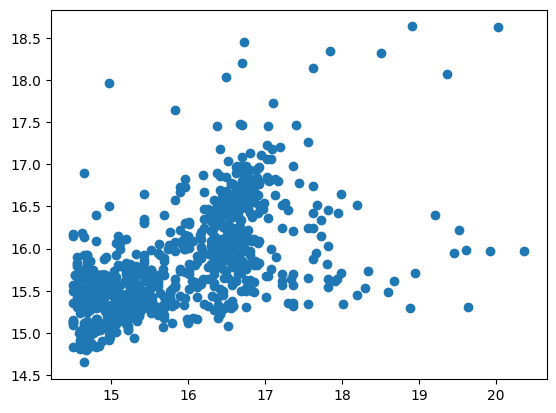

In [ ]:
import matplotlib.pyplot as plt
predictions = lin_reg.predict(X_test)
plt.scatter(y_test,predictions)


from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
from sklearn.svm import SVR
c=SVR(kernel='linear')
c.fit(X_train,y_train)

print(lin_reg.score(X_test, y_test))

0.36057754774744466
